In [109]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

##### In This Notebook We Will go through our dataset Trying to Understand Each Feature in it and Make a Detailed Analysis , Our Target Column is the gross 

In [110]:
# Read the dataset
df = pd.read_csv('movies.csv')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [111]:
col_names = df.columns
col_names

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


### Explore Categorical Data

In [113]:
# Find categorical variables
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

if categorical_columns:
    print("Categorical Variables are:")
    for i, col in enumerate(categorical_columns, 1):
        print(f"{i}. {col}")
else:
    print("No categorical variables found.")

Categorical Variables are:
1. name
2. rating
3. genre
4. released
5. director
6. writer
7. star
8. country
9. company


In [114]:
df[categorical_columns].head()

,name,rating,genre,released,director,writer,star,country,company
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures


In [115]:
df[categorical_columns].isnull().sum()

name         0
rating      77
genre        0
released     2
director     0
writer       3
star         1
country      3
company     17
dtype: int64

In [116]:
# View Frequency of Categorical Values
for col in categorical_columns:
    print(df[col].value_counts())
    print("-" * 50)

name
Nobody's Fool    3
Pulse            3
Hercules         3
Fever Pitch      3
Hamlet           3
                ..
More to Life     1
Dream Round      1
Saving Mbango    1
It's Just Us     1
Airplane!        1
Name: count, Length: 7512, dtype: int64
--------------------------------------------------
rating
R            3697
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64
--------------------------------------------------
genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64
---------------------

In [117]:
# Frequency Distribution of Categorical Columns
for col in categorical_columns:
    print(df[col].value_counts()/np.float64(len(df)))
    print("-" * 50)

name
Nobody's Fool    0.000391
Pulse            0.000391
Hercules         0.000391
Fever Pitch      0.000391
Hamlet           0.000391
                   ...   
More to Life     0.000130
Dream Round      0.000130
Saving Mbango    0.000130
It's Just Us     0.000130
Airplane!        0.000130
Name: count, Length: 7512, dtype: float64
--------------------------------------------------
rating
R            0.482134
PG-13        0.275430
PG           0.163276
Not Rated    0.036907
G            0.019953
Unrated      0.006781
NC-17        0.002999
TV-MA        0.001174
TV-PG        0.000652
X            0.000391
Approved     0.000130
TV-14        0.000130
Name: count, dtype: float64
--------------------------------------------------
genre
Comedy       0.292775
Action       0.222353
Drama        0.197966
Crime        0.071857
Biography    0.057773
Adventure    0.055686
Animation    0.044079
Horror       0.041993
Fantasy      0.005738
Mystery      0.002608
Thriller     0.002087
Family       0.001

In [118]:
# unique values in categorical columns
for col in categorical_columns:
    print(f"{col} has {df[col].nunique()} unique values")

name has 7512 unique values
rating has 12 unique values
genre has 19 unique values
released has 3414 unique values
director has 2949 unique values
writer has 4535 unique values
star has 2814 unique values
country has 59 unique values
company has 2385 unique values


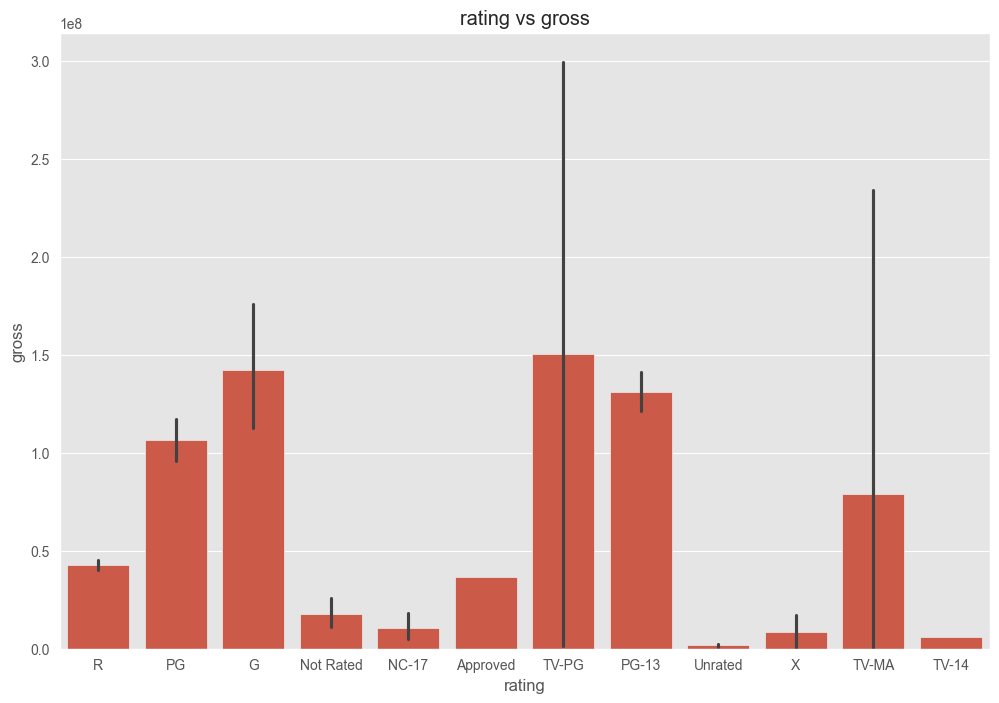

In [119]:
sns.barplot(data=df, x="rating", y="gross")
plt.title('rating vs gross')
plt.show()

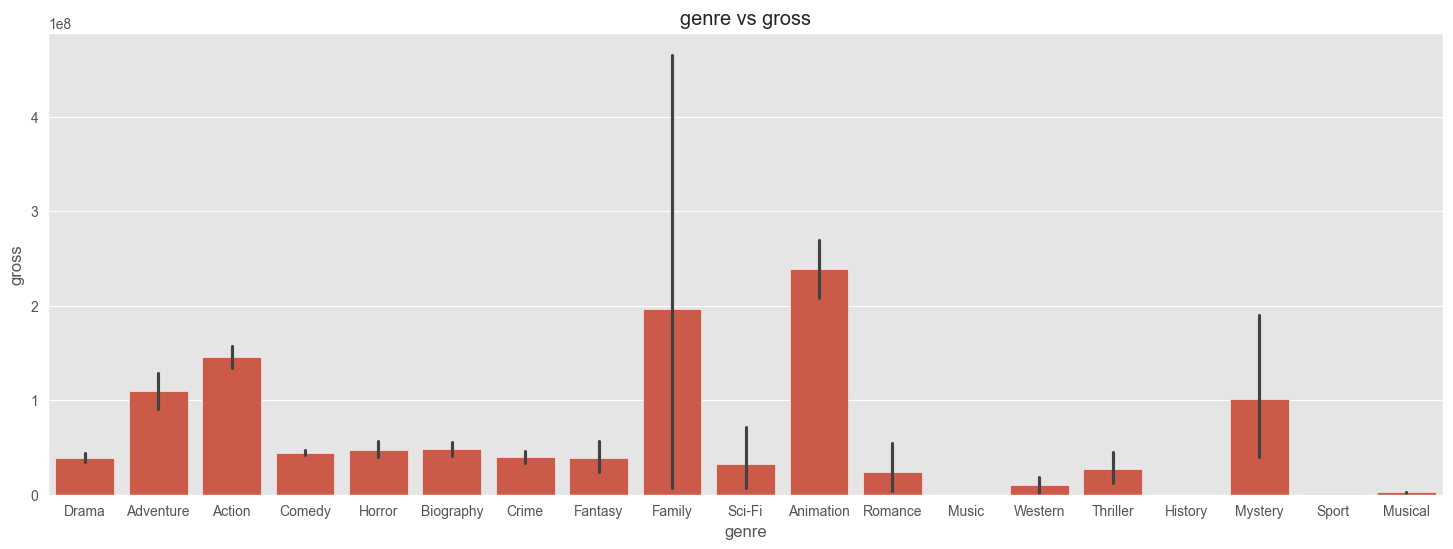

In [120]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x="genre", y="gross")
plt.title('genre vs gross')
plt.show()

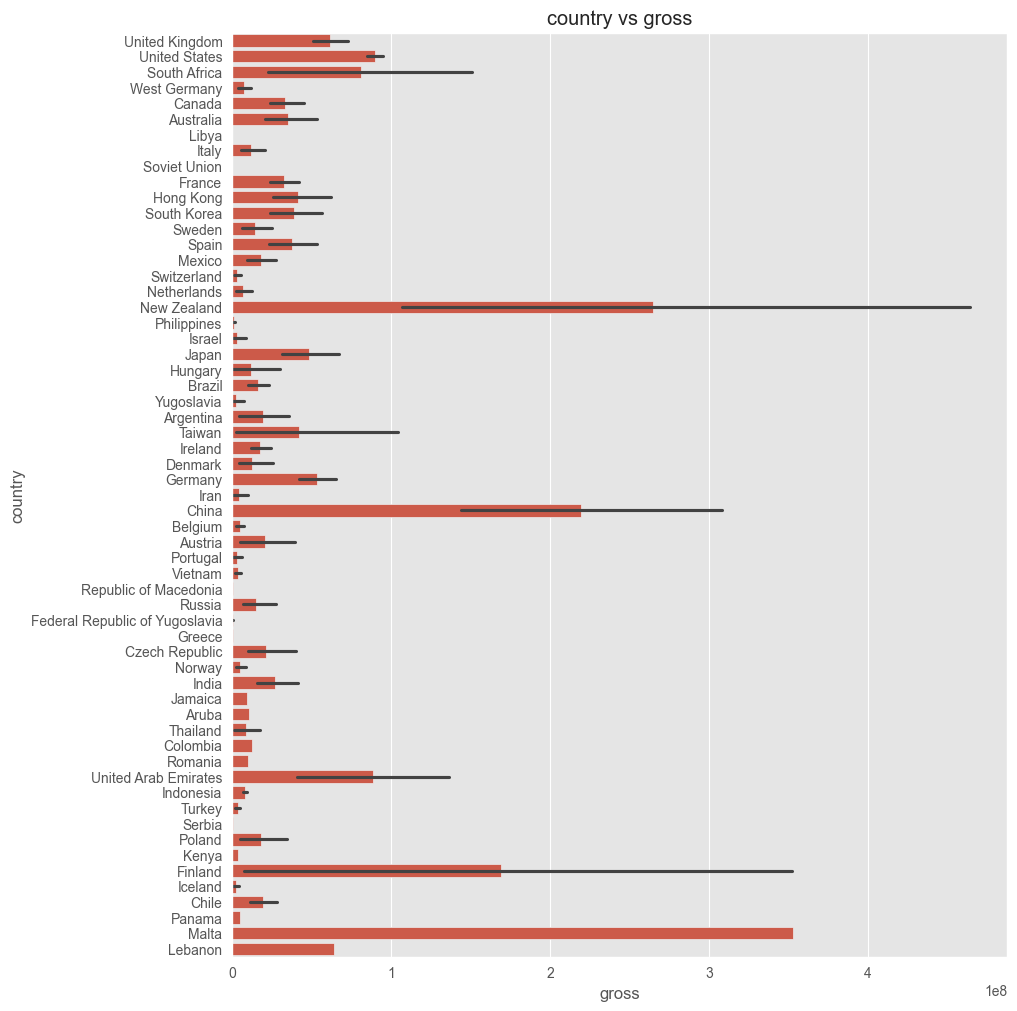

In [121]:
plt.figure(figsize=(10,12))
sns.barplot(data=df, y="country", x="gross")
plt.title('country vs gross')
plt.show()

### Handling Missing Values in Categorical Columns

In [122]:
df = df.loc[df['country'] != 'Israel']

In [123]:
df[categorical_columns].isnull().sum()

name         0
rating      77
genre        0
released     2
director     0
writer       3
star         1
country      3
company     17
dtype: int64

In [124]:
# Calculate the mode of the 'genre' column
mode_rating = df['rating'].mode()[0]

# Replace missing values with the mode
df['rating'].fillna(mode_rating, inplace=True)
print(mode_rating)

R


C:\Users\Omar\AppData\Local\Temp\ipykernel_20584\3493297342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(mode_rating, inplace=True)
C:\Users\Omar\AppData\Local\Temp\ipykernel_20584\3493297342.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'].fillna(mode_rating, inplace=True)


In [128]:
df = df.dropna(subset=['released','writer','star','country','company'])

In [129]:
df[categorical_columns].isnull().sum()

name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [130]:
df.shape

(7641, 15)

### Explore Numerical Data

In [131]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['year', 'score', 'votes', 'budget', 'gross', 'runtime']


In [132]:
# view the numerical variables

df[numerical].head()

,year,score,votes,budget,gross,runtime
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0


In [133]:
# check missing values in numerical variables

df[numerical].isnull().sum()

year          0
score         1
votes         1
budget     2153
gross       180
runtime       2
dtype: int64

In [134]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

         year   score      votes       budget         gross  runtime
count  7641.0  7640.0     7640.0       5488.0  7.461000e+03   7639.0
mean   2000.0     6.0    88354.0   35645932.0  7.864936e+07    107.0
std      11.0     1.0   163526.0   41468024.0  1.658755e+08     19.0
min    1980.0     2.0        7.0       3000.0  3.090000e+02     63.0
25%    1991.0     6.0     9200.0   10000000.0  4.562778e+06     95.0
50%    2000.0     6.0    33000.0   21000000.0  2.025141e+07    104.0
75%    2010.0     7.0    94000.0   45000000.0  7.613009e+07    116.0
max    2020.0     9.0  2400000.0  356000000.0  2.847246e+09    366.0 2


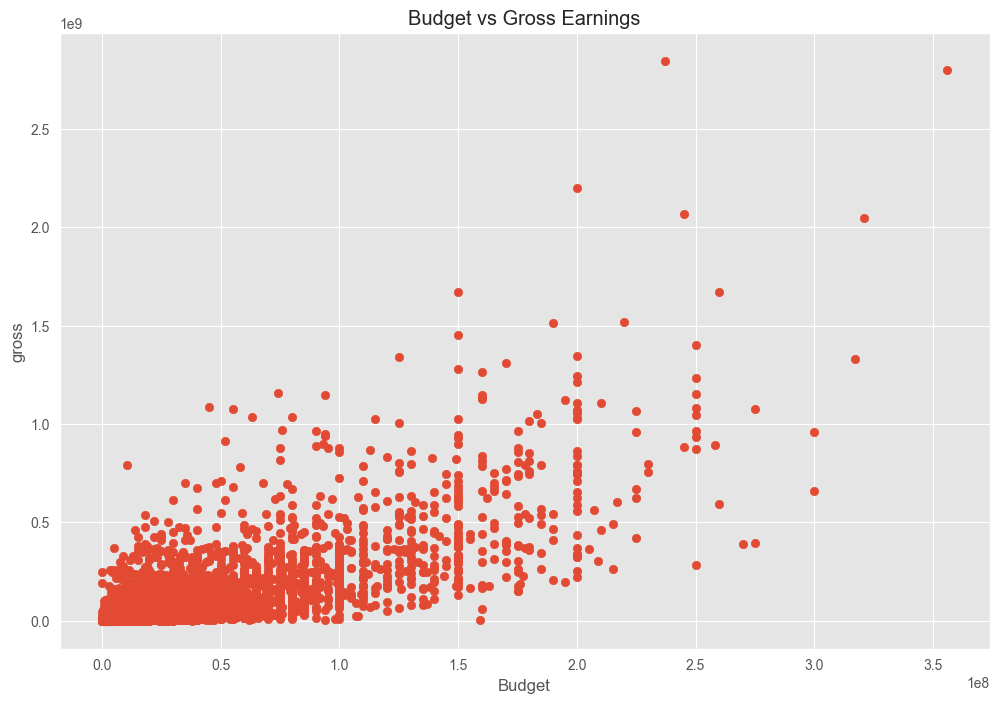

<Axes: xlabel='budget', ylabel='gross'>

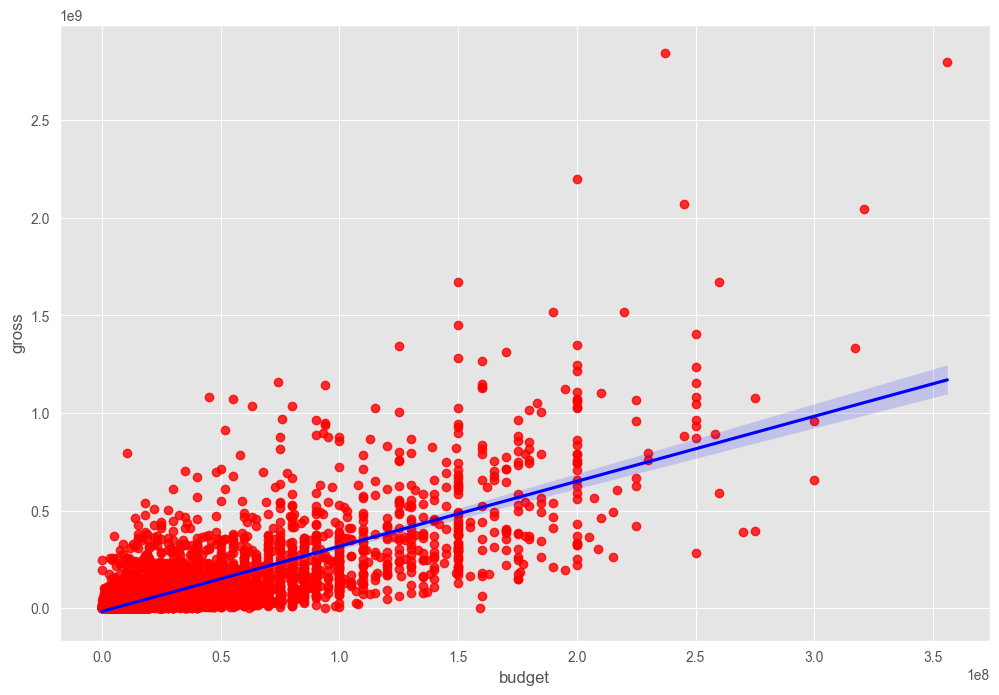

In [137]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('Budget')
plt.ylabel('gross')
plt.show()
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

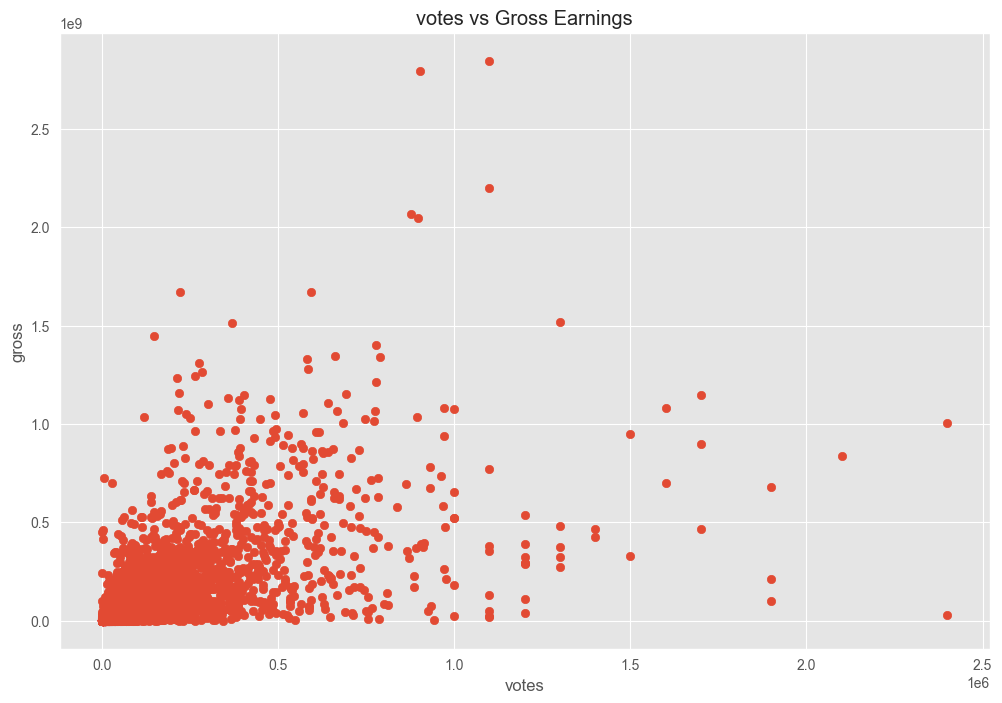

<Axes: xlabel='votes', ylabel='gross'>

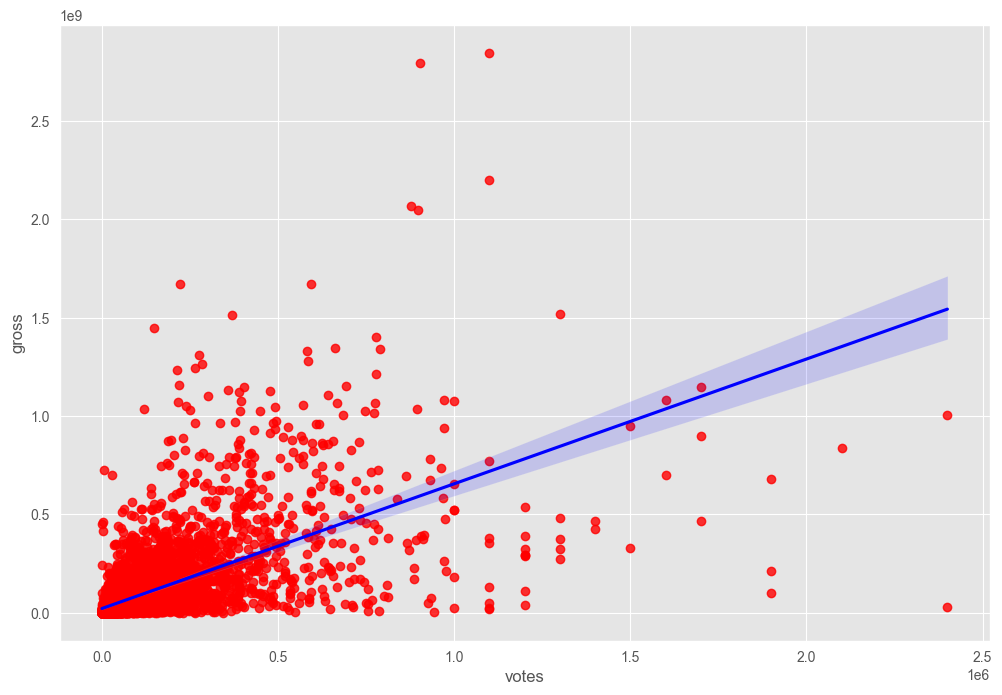

In [138]:
plt.scatter(x=df['votes'], y=df['gross'])
plt.title("votes vs Gross Earnings")
plt.xlabel('votes')
plt.ylabel('gross')
plt.show()
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [144]:
# plt.scatter(x=df['year'], y=df['gross'])
# plt.title("year vs Gross Earnings")
# plt.xlabel('year')
# plt.ylabel('gross')
# plt.show()
# sns.regplot(x='year', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

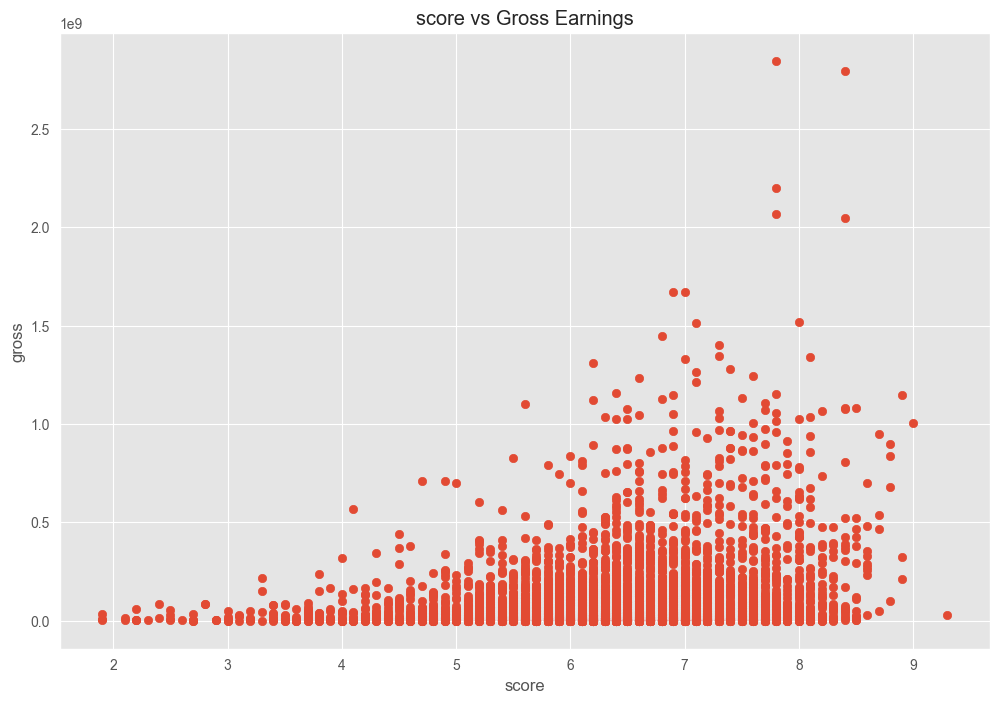

<Axes: xlabel='score', ylabel='gross'>

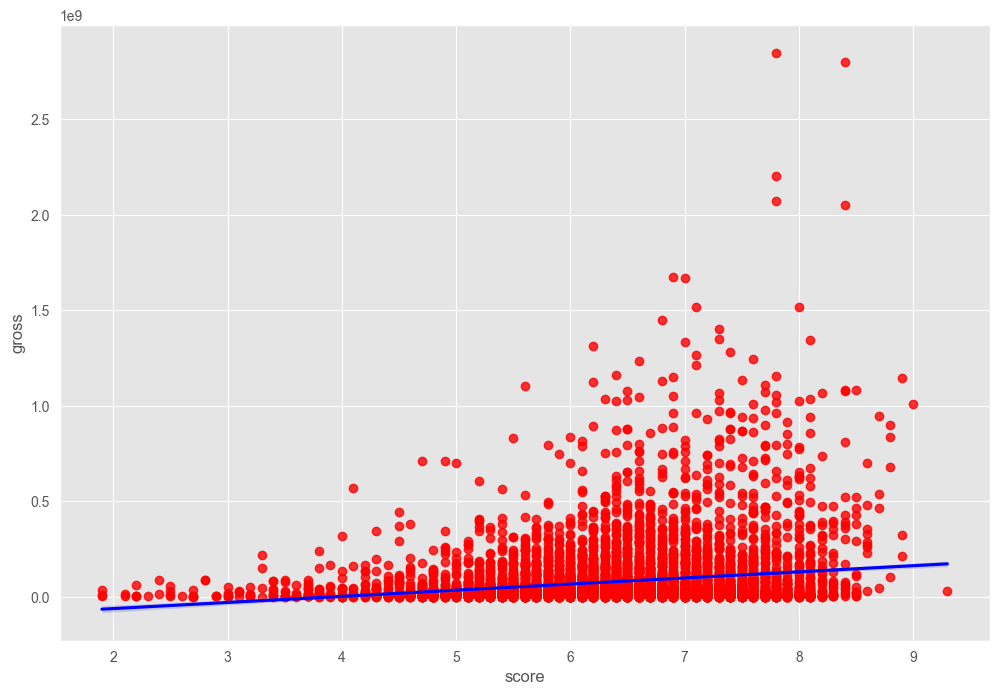

In [139]:
plt.scatter(x=df['score'], y=df['gross'])
plt.title("score vs Gross Earnings")
plt.xlabel('score')
plt.ylabel('gross')
plt.show()
sns.regplot(x='score', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [143]:
# plt.scatter(x=df['runtime'], y=df['gross'])
# plt.title("runtime vs Gross Earnings")
# plt.xlabel('runtime')
# plt.ylabel('gross')
# plt.show()
# sns.regplot(x='runtime', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

#### Correcting the year Column

In [142]:
df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.drop(['year'], axis=1, inplace=True)
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Aloha Surf Hotel,R,Comedy,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0,2020
7661,Love by Drowning,R,Drama,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0,2020
7664,Dream Round,R,Comedy,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,R,Drama,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020


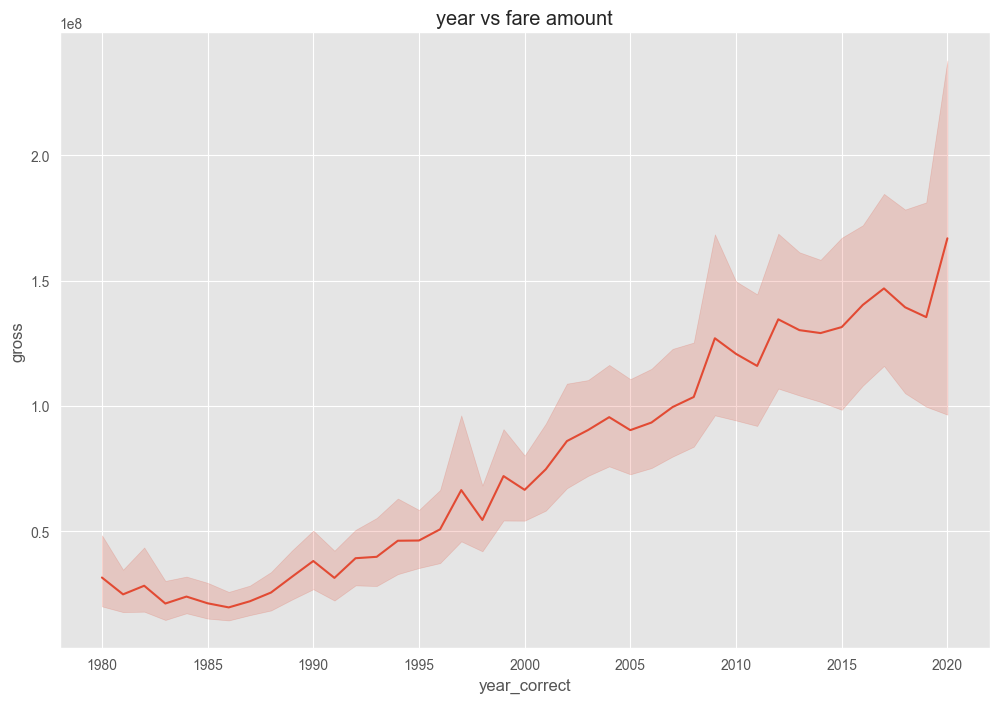

In [145]:
# Line Plot
sns.lineplot(data=df, x="year_correct", y="gross")
plt.title('year vs fare amount')
plt.show()

### let's start looking at the correlation

In [152]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric.corr()

,score,votes,budget,gross,runtime,year_correct
score,1.000000,0.409613,0.076122,0.186164,0.400249,0.105498
votes,0.409613,1.000000,0.442118,0.630696,0.308972,0.218644
budget,0.076122,0.442118,1.000000,0.740335,0.319830,0.322946
gross,0.186164,0.630696,0.740335,1.000000,0.245004,0.250634
runtime,0.400249,0.308972,0.319830,0.245004,1.000000,0.119697
year_correct,0.105498,0.218644,0.322946,0.250634,0.119697,1.000000


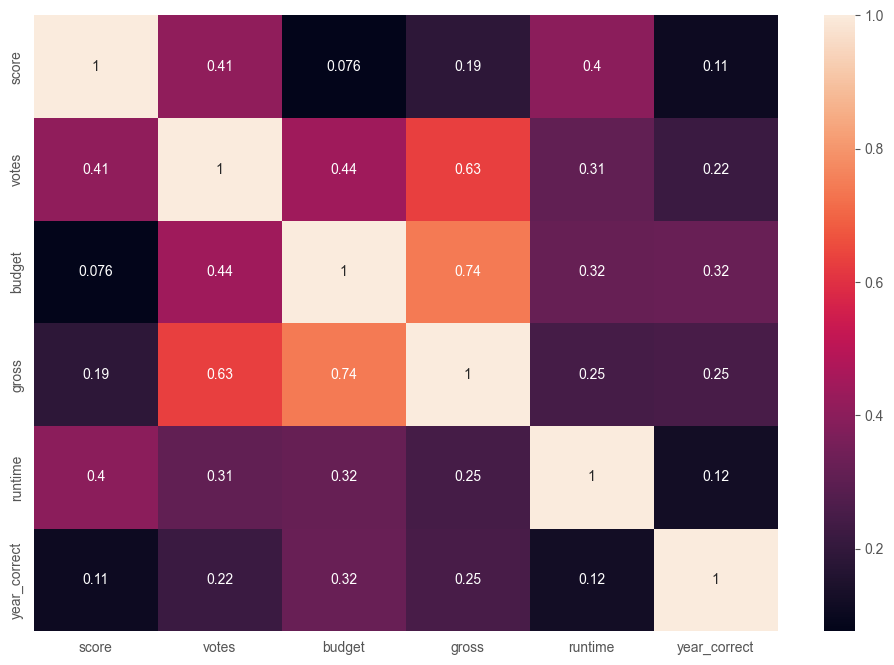

In [154]:
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

##### There is High Correlation Between the Budget and Votes With gross

#### Transforming Categorical Values

In [158]:
df_numerized = df
for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized        

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,6565,6,6,1699,8.4,927000.0,2576,3998,1040,53,19000000.0,46998772.0,2311,146.0,1980
1,5555,6,1,1488,5.8,65000.0,2259,1626,324,54,4500000.0,58853106.0,726,104.0,1980
2,5126,4,0,1765,8.7,1200000.0,1107,2556,1735,54,18000000.0,538375067.0,1533,124.0,1980
3,285,4,4,1488,7.7,221000.0,1295,1992,2236,54,3500000.0,83453539.0,1805,88.0,1980
4,1025,6,4,1538,7.3,108000.0,1050,516,407,54,6000000.0,39846344.0,1770,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,337,6,4,2753,7.1,14.0,2578,3975,193,54,NaN,NaN,83,90.0,2020
7661,3344,6,6,2766,NaN,NaN,1540,575,1986,54,1000000.0,NaN,879,121.0,2020
7664,1675,6,4,1103,4.7,36.0,771,2603,1876,54,NaN,NaN,534,90.0,2020
7665,4702,6,6,191,5.7,29.0,2051,2671,2030,54,58750.0,NaN,936,NaN,2020


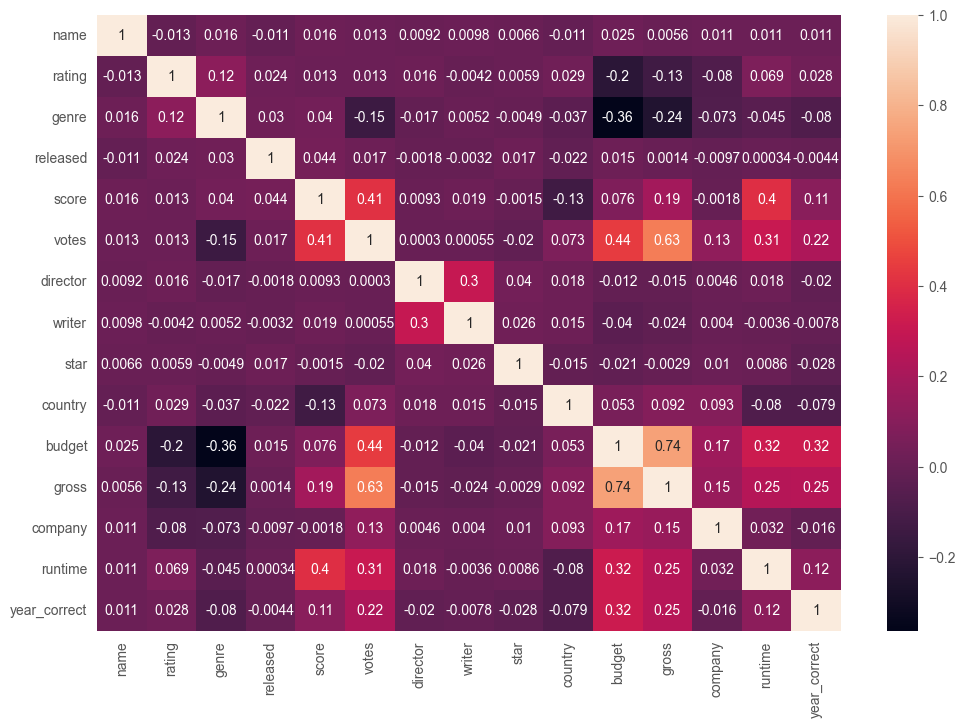

In [159]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [160]:
df_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.012659,0.015789,-0.010585,0.016201,0.013115,0.009168,0.009785,0.006570,-0.011229,0.024656,0.005574,0.011088,0.010745,0.011056
rating,-0.012659,1.000000,0.121000,0.024026,0.013350,0.013220,0.015551,-0.004232,0.005893,0.029468,-0.204594,-0.133281,-0.080365,0.069076,0.027640
genre,0.015789,0.121000,1.000000,0.030014,0.040074,-0.150094,-0.016523,0.005250,-0.004885,-0.036700,-0.363506,-0.242957,-0.073189,-0.045001,-0.080329
released,-0.010585,0.024026,0.030014,1.000000,0.044104,0.016524,-0.001818,-0.003207,0.016562,-0.022049,0.015346,0.001427,-0.009694,0.000341,-0.004357
score,0.016201,0.013350,0.040074,0.044104,1.000000,0.409613,0.009305,0.019245,-0.001467,-0.133484,0.076122,0.186164,-0.001810,0.400249,0.105498
votes,0.013115,0.013220,-0.150094,0.016524,0.409613,1.000000,0.000304,0.000554,-0.019749,0.073017,0.442118,0.630696,0.131591,0.308972,0.218644
director,0.009168,0.015551,-0.016523,-0.001818,0.009305,0.000304,1.000000,0.299106,0.039733,0.018337,-0.012070,-0.014818,0.004578,0.018092,-0.020371
writer,0.009785,-0.004232,0.005250,-0.003207,0.019245,0.000554,0.299106,1.000000,0.026450,0.015338,-0.039817,-0.023621,0.003973,-0.003615,-0.007764
star,0.006570,0.005893,-0.004885,0.016562,-0.001467,-0.019749,0.039733,0.026450,1.000000,-0.014658,-0.020948,-0.002862,0.010149,0.008630,-0.028267
country,-0.011229,0.029468,-0.036700,-0.022049,-0.133484,0.073017,0.018337,0.015338,-0.014658,1.000000,0.053378,0.092197,0.093425,-0.080165,-0.078741


In [161]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.012659
              genre           0.015789
              released       -0.010585
              score           0.016201
                                ...   
year_correct  budget          0.322946
              gross           0.250634
              company        -0.016157
              runtime         0.119697
              year_correct    1.000000
Length: 225, dtype: float64

In [162]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.363506
budget        genre          -0.363506
gross         genre          -0.242957
genre         gross          -0.242957
rating        budget         -0.204594
                                ...   
gross         gross           1.000000
budget        budget          1.000000
company       company         1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 225, dtype: float64

In [165]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

votes         gross           0.630696
gross         votes           0.630696
              budget          0.740335
budget        gross           0.740335
score         score           1.000000
votes         votes           1.000000
rating        rating          1.000000
name          name            1.000000
genre         genre           1.000000
released      released        1.000000
writer        writer          1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
gross         gross           1.000000
budget        budget          1.000000
company       company         1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

# - votes and budget has highest corr with the gross